## NIVELL 2

### *Exercici 2*

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
new_retards_df = pd.read_csv('NewRetardsFlights.csv')

In [3]:
new_retards_df

,Unnamed: 0,Unnamed: 0.1,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,0,2008,1,3,4,2003.0,1955,2211.0,2225,...,4.0,8.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
1,1,1,2008,1,3,4,754.0,735,1002.0,1000,...,5.0,10.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
2,2,2,2008,1,3,4,628.0,620,804.0,750,...,3.0,17.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
3,3,4,2008,1,3,4,1829.0,1755,1959.0,1925,...,3.0,10.0,0,N,0,2.000000,0.000000,0.000000,0.000000,32.000000
4,4,5,2008,1,3,4,1940.0,1915,2121.0,2110,...,4.0,10.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,...,9.0,18.0,0,N,0,3.000000,0.000000,0.000000,0.000000,22.000000
1936754,1936754,7009717,2008,12,13,6,657.0,600,904.0,749,...,15.0,34.0,0,N,0,0.000000,57.000000,18.000000,0.000000,0.000000
1936755,1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,...,8.0,32.0,0,N,0,1.000000,0.000000,19.000000,0.000000,79.000000
1936756,1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,...,13.0,13.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466


In [4]:
new_retards_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Year', 'Month', 'DayofMonth',
       'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode',
       'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'],
      dtype='object')

+ *A L'importar el dataset m'ha aparegut una segona variable "Unnamed ".Em desfaig de les dues*

In [5]:
new_retards_df.drop(new_retards_df.columns[[0, 1]], axis = 1, inplace = True)

In [6]:
new_retards_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.000000,0.000000,0.000000,0.000000,32.000000
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,9.0,18.0,0,N,0,3.000000,0.000000,0.000000,0.000000,22.000000
1936754,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,N,0,0.000000,57.000000,18.000000,0.000000,0.000000
1936755,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,N,0,1.000000,0.000000,19.000000,0.000000,79.000000
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466


+ *Genero un sud dataset amb un sample estratificat que mantingui la representavitat de cada Airline d'acord amb el seu número
   de vols sobre el total. que tenen el dataset original*

In [7]:
# defineixo el sample size que vull
N = 200000

# genero una nou dataset amb el random sample estratificat
sample_new_retards_df = new_retards_df .groupby('UniqueCarrier', 
group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(new_retards_df))))).sample(frac=1).reset_index(drop=True)

In [8]:
sample_new_retards_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,3,3,1,1052.0,1045,1529.0,1400,AA,2234,...,3.0,101.0,0,N,0,0.000000,0.000000,82.000000,0.000000,7.000000
1,2008,12,24,3,742.0,735,843.0,841,US,1914,...,7.0,13.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
2,2008,9,13,6,1934.0,1859,2139.0,2119,FL,333,...,25.0,10.0,0,N,0,0.000000,0.000000,0.000000,0.000000,20.000000
3,2008,2,14,4,1857.0,1850,2002.0,2005,WN,503,...,6.0,7.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
4,2008,9,5,5,1342.0,1330,1536.0,1540,AS,622,...,11.0,6.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,2008,4,11,5,1903.0,1815,2325.0,2120,US,719,...,7.0,123.0,0,N,0,0.000000,0.000000,77.000000,0.000000,48.000000
199995,2008,7,20,7,1327.0,1320,1441.0,1430,WN,381,...,4.0,19.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
199996,2008,4,14,1,1323.0,1315,1420.0,1415,WN,564,...,3.0,9.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
199997,2008,6,22,7,738.0,720,1025.0,1015,MQ,4022,...,3.0,10.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466


In [9]:
sample_new_retards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               199999 non-null  int64  
 1   Month              199999 non-null  int64  
 2   DayofMonth         199999 non-null  int64  
 3   DayOfWeek          199999 non-null  int64  
 4   DepTime            199999 non-null  float64
 5   CRSDepTime         199999 non-null  int64  
 6   ArrTime            199999 non-null  float64
 7   CRSArrTime         199999 non-null  int64  
 8   UniqueCarrier      199999 non-null  object 
 9   FlightNum          199999 non-null  int64  
 10  TailNum            199999 non-null  object 
 11  ActualElapsedTime  199999 non-null  float64
 12  CRSElapsedTime     199999 non-null  float64
 13  AirTime            199999 non-null  float64
 14  ArrDelay           199999 non-null  float64
 15  DepDelay           199999 non-null  float64
 16  Or

+ *La primera transformació de dades que voldria fer és convertir les columnes  DepTime, CRSDepTime,  ArrTime i CRSArrTime 
   a DateTime*
   
   *El primer pas és convertir les 2 columnes que tenen valors float amb decimals('0') a integers com a manera més ràpida*

In [10]:
sample_new_retards_df['DepTime'] = sample_new_retards_df['DepTime'].astype(int)
sample_new_retards_df['ArrTime'] = sample_new_retards_df['ArrTime'].astype(int)
sample_new_retards_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,3,3,1,1052,1045,1529,1400,AA,2234,...,3.0,101.0,0,N,0,0.000000,0.000000,82.000000,0.000000,7.000000
1,2008,12,24,3,742,735,843,841,US,1914,...,7.0,13.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
2,2008,9,13,6,1934,1859,2139,2119,FL,333,...,25.0,10.0,0,N,0,0.000000,0.000000,0.000000,0.000000,20.000000
3,2008,2,14,4,1857,1850,2002,2005,WN,503,...,6.0,7.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
4,2008,9,5,5,1342,1330,1536,1540,AS,622,...,11.0,6.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,2008,4,11,5,1903,1815,2325,2120,US,719,...,7.0,123.0,0,N,0,0.000000,0.000000,77.000000,0.000000,48.000000
199995,2008,7,20,7,1327,1320,1441,1430,WN,381,...,4.0,19.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
199996,2008,4,14,1,1323,1315,1420,1415,WN,564,...,3.0,9.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
199997,2008,6,22,7,738,720,1025,1015,MQ,4022,...,3.0,10.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466


+ *Després haig d'aconseguir que les dades tinguin totes 4 dígits, omplint de zeros per l'esquerra les dades que calgui*

In [11]:
sample_new_retards_df['DepTime'] = sample_new_retards_df['DepTime'].astype(str).str.zfill(4)
sample_new_retards_df['CRSDepTime'] = sample_new_retards_df['CRSDepTime'].astype(str).str.zfill(4)
sample_new_retards_df['ArrTime'] = sample_new_retards_df['ArrTime'].astype(str).str.zfill(4)
sample_new_retards_df['CRSArrTime'] = sample_new_retards_df['CRSArrTime'].astype(str).str.zfill(4)

In [12]:
sample_new_retards_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,3,3,1,1052,1045,1529,1400,AA,2234,...,3.0,101.0,0,N,0,0.000000,0.000000,82.000000,0.000000,7.000000
1,2008,12,24,3,0742,0735,0843,0841,US,1914,...,7.0,13.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
2,2008,9,13,6,1934,1859,2139,2119,FL,333,...,25.0,10.0,0,N,0,0.000000,0.000000,0.000000,0.000000,20.000000
3,2008,2,14,4,1857,1850,2002,2005,WN,503,...,6.0,7.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
4,2008,9,5,5,1342,1330,1536,1540,AS,622,...,11.0,6.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,2008,4,11,5,1903,1815,2325,2120,US,719,...,7.0,123.0,0,N,0,0.000000,0.000000,77.000000,0.000000,48.000000
199995,2008,7,20,7,1327,1320,1441,1430,WN,381,...,4.0,19.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
199996,2008,4,14,1,1323,1315,1420,1415,WN,564,...,3.0,9.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
199997,2008,6,22,7,0738,0720,1025,1015,MQ,4022,...,3.0,10.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466


+ *I ara re-escric les dades perquè tinguin el format e que vull que acabin tenint*

In [13]:
sample_new_retards_df['DepTime'] = sample_new_retards_df['DepTime'].astype(str).str[:2]  + ':' + sample_new_retards_df['DepTime'].astype(str).str[2:] + ':00'
sample_new_retards_df['CRSDepTime'] = sample_new_retards_df['CRSDepTime'].astype(str).str[:2] + ':' + sample_new_retards_df['CRSDepTime'].astype(str).str[2:] + ':00'
sample_new_retards_df['ArrTime'] = sample_new_retards_df['ArrTime'].astype(str).str[:2] + ':' + sample_new_retards_df['ArrTime'].astype(str).str[2:] + ':00'
sample_new_retards_df['CRSArrTime'] = sample_new_retards_df['CRSArrTime'].astype(str).str[:2] + ':' + sample_new_retards_df['CRSArrTime'].astype(str).str[2:] + ':00'

In [14]:
sample_new_retards_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,3,3,1,10:52:00,10:45:00,15:29:00,14:00:00,AA,2234,...,3.0,101.0,0,N,0,0.000000,0.000000,82.000000,0.000000,7.000000
1,2008,12,24,3,07:42:00,07:35:00,08:43:00,08:41:00,US,1914,...,7.0,13.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
2,2008,9,13,6,19:34:00,18:59:00,21:39:00,21:19:00,FL,333,...,25.0,10.0,0,N,0,0.000000,0.000000,0.000000,0.000000,20.000000
3,2008,2,14,4,18:57:00,18:50:00,20:02:00,20:05:00,WN,503,...,6.0,7.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
4,2008,9,5,5,13:42:00,13:30:00,15:36:00,15:40:00,AS,622,...,11.0,6.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,2008,4,11,5,19:03:00,18:15:00,23:25:00,21:20:00,US,719,...,7.0,123.0,0,N,0,0.000000,0.000000,77.000000,0.000000,48.000000
199995,2008,7,20,7,13:27:00,13:20:00,14:41:00,14:30:00,WN,381,...,4.0,19.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
199996,2008,4,14,1,13:23:00,13:15:00,14:20:00,14:15:00,WN,564,...,3.0,9.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
199997,2008,6,22,7,07:38:00,07:20:00,10:25:00,10:15:00,MQ,4022,...,3.0,10.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466


In [15]:
import datetime as dt
from datetime import datetime

+ *Un cop importat el mòdul datetime, començo a convertir columnes*

In [16]:
sample_new_retards_df['DepTime']= pd.to_datetime(sample_new_retards_df['DepTime'])

ParserError: hour must be in 0..23: 24:00:00

+ *M'ha donat un error.Sembla ser que hi ha valors = 24:00:00; que no admet la funció "pd.to_datetime()"*

  *I comprovo amb ".loc" quantes files tenen el valor 24:00:00 a cada una de les columnes*

In [17]:
df = sample_new_retards_df.loc[sample_new_retards_df['DepTime'] == '24:00:00']

In [18]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
313,2008,8,14,4,24:00:00,21:54:00,01:46:00,23:49:00,US,401,...,5.0,11.0,0,N,0,0.000000,117.000000,0.000000,0.000000,0.000000
5266,2008,7,29,2,24:00:00,20:50:00,08:19:00,05:15:00,AA,272,...,11.0,12.0,0,N,0,184.000000,0.000000,0.000000,0.000000,0.000000
7602,2008,7,29,2,24:00:00,21:55:00,00:44:00,22:50:00,WN,3422,...,2.0,7.0,0,N,0,12.000000,0.000000,0.000000,0.000000,102.000000
10223,2008,6,29,7,24:00:00,17:50:00,01:55:00,20:15:00,OH,5257,...,2.0,20.0,0,N,0,340.000000,0.000000,0.000000,0.000000,0.000000
32767,2008,6,1,7,24:00:00,23:50:00,06:58:00,07:09:00,US,502,...,5.0,16.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
38886,2008,12,24,3,24:00:00,23:35:00,07:53:00,07:55:00,AA,150,...,11.0,14.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
47910,2008,8,4,1,24:00:00,18:55:00,03:10:00,22:06:00,UA,1234,...,6.0,26.0,0,N,0,0.000000,44.000000,0.000000,0.000000,260.000000
50841,2008,6,9,1,24:00:00,23:51:00,02:14:00,01:56:00,YV,2945,...,3.0,20.0,0,N,0,18.000000,0.000000,0.000000,0.000000,0.000000
53607,2008,8,28,4,24:00:00,21:50:00,01:23:00,22:58:00,US,192,...,5.0,25.0,0,N,0,0.000000,130.000000,15.000000,0.000000,0.000000
57105,2008,8,11,1,24:00:00,22:55:00,01:23:00,00:22:00,UA,717,...,7.0,16.0,0,N,0,10.000000,0.000000,0.000000,0.000000,51.000000


In [19]:
df2 = sample_new_retards_df.loc[sample_new_retards_df['CRSDepTime'] == '24:00:00']

In [20]:
df2

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [21]:
df3 = sample_new_retards_df.loc[sample_new_retards_df['ArrTime'] == '24:00:00']

In [22]:
df3

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1727,2008,10,24,5,20:33:00,20:25:00,24:00:00,23:55:00,WN,1403,...,5.0,11.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
4297,2008,5,11,7,21:11:00,20:40:00,24:00:00,23:30:00,B6,1206,...,7.0,14.0,0,N,0,24.000000,0.000000,0.000000,0.000000,6.000000
6268,2008,3,2,7,20:45:00,18:10:00,24:00:00,21:20:00,XE,26,...,5.0,10.0,0,N,0,28.000000,0.000000,5.000000,0.000000,127.000000
10077,2008,7,27,7,22:59:00,21:00:00,24:00:00,22:19:00,US,2188,...,12.0,8.0,0,N,0,0.000000,0.000000,0.000000,0.000000,101.000000
10926,2008,8,11,1,18:59:00,18:50:00,24:00:00,00:10:00,AA,2426,...,5.0,8.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195649,2008,12,24,3,20:41:00,20:35:00,24:00:00,23:59:00,AA,1702,...,3.0,14.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
196058,2008,8,23,6,22:40:00,21:55:00,24:00:00,23:28:00,UA,898,...,3.0,12.0,0,N,0,32.000000,0.000000,0.000000,0.000000,0.000000
197807,2008,12,1,1,21:27:00,21:05:00,24:00:00,23:51:00,B6,97,...,33.0,21.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
198001,2008,5,23,5,21:32:00,20:36:00,24:00:00,22:51:00,FL,373,...,9.0,36.0,0,N,0,0.000000,0.000000,13.000000,0.000000,56.000000


In [23]:
df4 = sample_new_retards_df.loc[sample_new_retards_df['CRSArrTime'] == '24:00:00']

In [24]:
df4

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
6705,2008,7,7,1,17:08:00,15:12:00,16:10:00,24:00:00,9E,5648,...,6.812975,33.0,0,N,1,19.179399,3.703571,15.021635,0.090137,25.296466
16420,2008,1,30,3,11:26:00,10:13:00,16:10:00,24:00:00,9E,3756,...,6.812975,29.0,0,N,1,19.179399,3.703571,15.021635,0.090137,25.296466
18498,2008,7,5,6,17:18:00,17:00:00,16:10:00,24:00:00,9E,5748,...,6.812975,16.0,0,N,1,19.179399,3.703571,15.021635,0.090137,25.296466
24341,2008,7,25,5,15:28:00,15:10:00,16:10:00,24:00:00,9E,5903,...,6.812975,21.0,0,N,1,19.179399,3.703571,15.021635,0.090137,25.296466
28923,2008,2,5,2,17:02:00,16:55:00,16:10:00,24:00:00,9E,5907,...,6.812975,25.0,0,N,1,19.179399,3.703571,15.021635,0.090137,25.296466
32204,2008,1,10,4,07:20:00,07:05:00,16:10:00,24:00:00,9E,5772,...,6.812975,9.0,0,N,1,19.179399,3.703571,15.021635,0.090137,25.296466
38073,2008,3,31,1,22:24:00,19:45:00,16:10:00,24:00:00,9E,2029,...,6.812975,22.0,0,N,1,19.179399,3.703571,15.021635,0.090137,25.296466
70938,2008,7,9,3,07:47:00,07:05:00,16:10:00,24:00:00,9E,5917,...,6.812975,12.0,0,N,1,19.179399,3.703571,15.021635,0.090137,25.296466
82348,2008,4,20,7,09:55:00,08:00:00,16:10:00,24:00:00,9E,4749,...,6.812975,32.0,0,N,1,19.179399,3.703571,15.021635,0.090137,25.296466
109066,2008,1,31,4,20:21:00,19:30:00,16:10:00,24:00:00,9E,5722,...,6.812975,22.0,0,N,1,19.179399,3.703571,15.021635,0.090137,25.296466


+ *Defineixo una funció per substituïr el valor 24:00:00 per 00:00:00 quan el trobi a cada columna*

In [25]:
def way_to_datetime(date_str):
    x = date_str
    if date_str == '24:00:00':
        return '00:00:00'

    else:
        return x
          

In [26]:
sample_new_retards_df['DepTime'] = sample_new_retards_df.DepTime.apply(way_to_datetime)

In [27]:
sample_new_retards_df['CRSDepTime'] = sample_new_retards_df.CRSDepTime.apply(way_to_datetime)

In [28]:
sample_new_retards_df['ArrTime'] = sample_new_retards_df.ArrTime.apply(way_to_datetime)

In [29]:
sample_new_retards_df['CRSArrTime'] = sample_new_retards_df.CRSArrTime.apply(way_to_datetime)

In [30]:
sample_new_retards_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,3,3,1,10:52:00,10:45:00,15:29:00,14:00:00,AA,2234,...,3.0,101.0,0,N,0,0.000000,0.000000,82.000000,0.000000,7.000000
1,2008,12,24,3,07:42:00,07:35:00,08:43:00,08:41:00,US,1914,...,7.0,13.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
2,2008,9,13,6,19:34:00,18:59:00,21:39:00,21:19:00,FL,333,...,25.0,10.0,0,N,0,0.000000,0.000000,0.000000,0.000000,20.000000
3,2008,2,14,4,18:57:00,18:50:00,20:02:00,20:05:00,WN,503,...,6.0,7.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
4,2008,9,5,5,13:42:00,13:30:00,15:36:00,15:40:00,AS,622,...,11.0,6.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,2008,4,11,5,19:03:00,18:15:00,23:25:00,21:20:00,US,719,...,7.0,123.0,0,N,0,0.000000,0.000000,77.000000,0.000000,48.000000
199995,2008,7,20,7,13:27:00,13:20:00,14:41:00,14:30:00,WN,381,...,4.0,19.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
199996,2008,4,14,1,13:23:00,13:15:00,14:20:00,14:15:00,WN,564,...,3.0,9.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
199997,2008,6,22,7,07:38:00,07:20:00,10:25:00,10:15:00,MQ,4022,...,3.0,10.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466


+ *I comprovo que no queda cap fila a cap de les 4 columnes amb el valor que no funcionava (24:00:00)*

In [31]:
df = sample_new_retards_df.loc[sample_new_retards_df['DepTime'] == '24:00:00']

In [32]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [33]:
df2 = sample_new_retards_df.loc[sample_new_retards_df['CRSDepTime'] == '24:00:00']

In [34]:
df2 

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [35]:
df3 = sample_new_retards_df.loc[sample_new_retards_df['ArrTime'] == '24:00:00'] = sample_new_retards_df.loc[sample_new_retards_df['ArrTime'] == '24:00:00']

In [36]:
df3

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [37]:
df4 = sample_new_retards_df.loc[sample_new_retards_df['CRSArrTime'] == '24:00:00']

In [38]:
df4

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


+ *Âra sí puc començar a convertir en datetime les 4 columnes*

In [39]:
sample_new_retards_df['DepTime'] = pd.to_datetime(sample_new_retards_df['DepTime']).dt.time

In [40]:
sample_new_retards_df['CRSDepTime'] = pd.to_datetime(sample_new_retards_df['CRSDepTime']).dt.time

In [41]:
sample_new_retards_df['ArrTime'] = pd.to_datetime(sample_new_retards_df['ArrTime']).dt.time

In [42]:
sample_new_retards_df['CRSArrTime'] = pd.to_datetime(sample_new_retards_df['CRSArrTime']).dt.time

In [43]:
sample_new_retards_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,3,3,1,10:52:00,10:45:00,15:29:00,14:00:00,AA,2234,...,3.0,101.0,0,N,0,0.000000,0.000000,82.000000,0.000000,7.000000
1,2008,12,24,3,07:42:00,07:35:00,08:43:00,08:41:00,US,1914,...,7.0,13.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
2,2008,9,13,6,19:34:00,18:59:00,21:39:00,21:19:00,FL,333,...,25.0,10.0,0,N,0,0.000000,0.000000,0.000000,0.000000,20.000000
3,2008,2,14,4,18:57:00,18:50:00,20:02:00,20:05:00,WN,503,...,6.0,7.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
4,2008,9,5,5,13:42:00,13:30:00,15:36:00,15:40:00,AS,622,...,11.0,6.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,2008,4,11,5,19:03:00,18:15:00,23:25:00,21:20:00,US,719,...,7.0,123.0,0,N,0,0.000000,0.000000,77.000000,0.000000,48.000000
199995,2008,7,20,7,13:27:00,13:20:00,14:41:00,14:30:00,WN,381,...,4.0,19.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
199996,2008,4,14,1,13:23:00,13:15:00,14:20:00,14:15:00,WN,564,...,3.0,9.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
199997,2008,6,22,7,07:38:00,07:20:00,10:25:00,10:15:00,MQ,4022,...,3.0,10.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466


+ *Ara genero una nova columna per saber la velocitat mijana de vol amb el cocient de "distance" i "AirTime"*

  *Però primer m'asseguro de què la columna "AirTime" no conté valors = 0; que em portarien a un resultat = infinit*

In [44]:
sample_new_retards_df['AirTime'].describe()

count    199999.00000
mean        108.22260
std          68.36987
min           0.00000
25%          58.00000
50%          91.00000
75%         137.00000
max        1091.00000
Name: AirTime, dtype: float64

+ *Efectivament vec que existeix el valor = 0 ("min")*

  *Elimino les files que contenen aquest valor*

In [45]:
air_time_0 = sample_new_retards_df.loc[sample_new_retards_df['AirTime'] == 0]
air_time_0

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
12345,2008,2,12,2,19:28:00,16:31:00,23:18:00,20:15:00,OO,5854,...,8.0,162.0,0,N,0,0.0,0.0,183.0,0.0,0.0
49080,2008,3,18,2,17:59:00,16:11:00,21:32:00,19:55:00,OO,5854,...,12.0,141.0,0,N,0,0.0,0.0,97.0,0.0,0.0


In [46]:
index_names = sample_new_retards_df[sample_new_retards_df['AirTime'] == 0].index
sample_new_retards_df.drop(index_names, inplace = True)
sample_new_retards_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,3,3,1,10:52:00,10:45:00,15:29:00,14:00:00,AA,2234,...,3.0,101.0,0,N,0,0.000000,0.000000,82.000000,0.000000,7.000000
1,2008,12,24,3,07:42:00,07:35:00,08:43:00,08:41:00,US,1914,...,7.0,13.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
2,2008,9,13,6,19:34:00,18:59:00,21:39:00,21:19:00,FL,333,...,25.0,10.0,0,N,0,0.000000,0.000000,0.000000,0.000000,20.000000
3,2008,2,14,4,18:57:00,18:50:00,20:02:00,20:05:00,WN,503,...,6.0,7.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
4,2008,9,5,5,13:42:00,13:30:00,15:36:00,15:40:00,AS,622,...,11.0,6.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,2008,4,11,5,19:03:00,18:15:00,23:25:00,21:20:00,US,719,...,7.0,123.0,0,N,0,0.000000,0.000000,77.000000,0.000000,48.000000
199995,2008,7,20,7,13:27:00,13:20:00,14:41:00,14:30:00,WN,381,...,4.0,19.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
199996,2008,4,14,1,13:23:00,13:15:00,14:20:00,14:15:00,WN,564,...,3.0,9.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
199997,2008,6,22,7,07:38:00,07:20:00,10:25:00,10:15:00,MQ,4022,...,3.0,10.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466


+ *I vec que només era 1 observació la que tenia el valor "AirTime" = 0*

In [47]:
sample_new_retards_df['AirTime'].describe()

count    199997.000000
mean        108.223682
std          68.369355
min           1.000000
25%          58.000000
50%          91.000000
75%         137.000000
max        1091.000000
Name: AirTime, dtype: float64

In [48]:
sample_new_retards_df['Distance']

0          964
1          599
2          665
3          325
4          762
          ... 
199994    2401
199995     258
199996     220
199997     723
199998     758
Name: Distance, Length: 199997, dtype: int64

In [49]:
sample_new_retards_df['VelocMitjanaVol'] = sample_new_retards_df['Distance'] / sample_new_retards_df['AirTime']

+ *Ara generem una nova  columna (''DepartureLate?').Mirarem si els valors per cada observació de la mostra, a la columna 
  'DepDelay' és > a 20 minuts.
  
  *Caldrà fer una petita funció que em retorni YES o NO si el DepDelay és més gran que 20 minuts, i amb el mètode "apply()"
   l'aplicarem a tots els valors de la columna*

In [50]:
def rating_departure_delay(x):
    if x > 20.0:
        return 'YES'
    else:
        return 'NO'

In [51]:
sample_new_retards_df['DepartureLate?'] = sample_new_retards_df['DepDelay'].apply(rating_departure_delay)

In [52]:
sample_new_retards_df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'VelocMitjanaVol', 'DepartureLate?'],
      dtype='object')

In [53]:
sample_new_retards_dummies_df = pd.get_dummies(sample_new_retards_df, columns = ['UniqueCarrier','Cancelled', 'CancellationCode', 'Diverted'])
sample_new_retards_dummies_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,...,UniqueCarrier_XE,UniqueCarrier_YV,Cancelled_0,Cancelled_1,CancellationCode_A,CancellationCode_B,CancellationCode_C,CancellationCode_N,Diverted_0,Diverted_1
0,2008,3,3,1,10:52:00,10:45:00,15:29:00,14:00:00,2234,N3DEAA,...,0,0,1,0,0,0,0,1,1,0
1,2008,12,24,3,07:42:00,07:35:00,08:43:00,08:41:00,1914,N766US,...,0,0,1,0,0,0,0,1,1,0
2,2008,9,13,6,19:34:00,18:59:00,21:39:00,21:19:00,333,N906AT,...,0,0,1,0,0,0,0,1,1,0
3,2008,2,14,4,18:57:00,18:50:00,20:02:00,20:05:00,503,N751SW,...,0,0,1,0,0,0,0,1,1,0
4,2008,9,5,5,13:42:00,13:30:00,15:36:00,15:40:00,622,N615AS,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,2008,4,11,5,19:03:00,18:15:00,23:25:00,21:20:00,719,N179UW,...,0,0,1,0,0,0,0,1,1,0
199995,2008,7,20,7,13:27:00,13:20:00,14:41:00,14:30:00,381,N799SW,...,0,0,1,0,0,0,0,1,1,0
199996,2008,4,14,1,13:23:00,13:15:00,14:20:00,14:15:00,564,N266WN,...,0,0,1,0,0,0,0,1,1,0
199997,2008,6,22,7,07:38:00,07:20:00,10:25:00,10:15:00,4022,N661JA,...,0,0,1,0,0,0,0,1,1,0


In [54]:
sample_new_retards_dummies_df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'VelocMitjanaVol',
       'DepartureLate?', 'UniqueCarrier_9E', 'UniqueCarrier_AA',
       'UniqueCarrier_AQ', 'UniqueCarrier_AS', 'UniqueCarrier_B6',
       'UniqueCarrier_CO', 'UniqueCarrier_DL', 'UniqueCarrier_EV',
       'UniqueCarrier_F9', 'UniqueCarrier_FL', 'UniqueCarrier_HA',
       'UniqueCarrier_MQ', 'UniqueCarrier_NW', 'UniqueCarrier_OH',
       'UniqueCarrier_OO', 'UniqueCarrier_UA', 'UniqueCarrier_US',
       'UniqueCarrier_WN', 'UniqueCarrier_XE', 'UniqueCarrier_YV',
       'Cancelled_0', 'Cancelled_1', 'CancellationCode_A',
       'CancellationCode_B', 'CancellationCode_C', 'CancellationCode_N',
       'Diverted_0', '

+ *Ara standaritzo totes les variables numèriques referides al concepte de "Delay".Em sembla intuitivament que pot tenir sentit
   per fer coses posteriorment.I deixo com estan les altres variables numériques que em sembla que pot convenir més tenir amb 
   els seus valors originals.Per exemple Year, month, DayofMonth DepTime, ArrTime i DayOfWeek que són convertibles a Datetime 
   objects.*
   
   *O  FlightNum, VelocitatMitjanaVol i DepartureLate?, que tenen molt sentit tal com les tenim ara al dataset.*

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
trans = StandardScaler()
temp_retards_df = trans.fit_transform(sample_new_retards_df[[ 'ArrDelay','DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
                                                       'SecurityDelay', 'LateAircraftDelay']])

In [57]:
temp_retards_df

array([[ 8.24145823e-01, -6.77392032e-01, -5.51217432e-01, ...,
         2.45653574e+00, -5.60382065e-02, -5.39722915e-01],
       [-7.10039452e-01, -6.77392032e-01, -5.44168955e-04, ...,
        -3.57294178e-03, -8.05538857e-04,  1.25533103e-03],
       [-3.92621809e-01, -1.53717298e-01, -5.51217432e-01, ...,
        -5.55316121e-01, -5.60382065e-02, -1.55347204e-01],
       ...,
       [-6.57136511e-01, -6.58689363e-01, -5.44168955e-04, ...,
        -3.57294178e-03, -8.05538857e-04,  1.25533103e-03],
       [-5.68964944e-01, -4.71662673e-01, -5.44168955e-04, ...,
        -3.57294178e-03, -8.05538857e-04,  1.25533103e-03],
       [-8.33479646e-01, -5.65176018e-01, -5.44168955e-04, ...,
        -3.57294178e-03, -8.05538857e-04,  1.25533103e-03]])

+ *I obtinc un resultat en forma de array.Per tant ho converteixo en un data frame amb la funció "DataFrame()"*

In [58]:
from pandas import DataFrame

In [59]:
retards_stdscaler_df = DataFrame(temp_retards_df)

In [60]:
retards_stdscaler_df

,0,1,2,3,4,5,6
0,0.824146,-0.677392,-0.551217,-0.212404,2.456536,-0.056038,-0.539723
1,-0.710039,-0.677392,-0.000544,-0.000742,-0.003573,-0.000806,0.001255
2,-0.392622,-0.153717,-0.551217,-0.212404,-0.555316,-0.056038,-0.155347
3,-0.798211,-0.677392,-0.000544,-0.000742,-0.003573,-0.000806,0.001255
4,-0.815845,-0.583879,-0.000544,-0.000742,-0.003573,-0.000806,0.001255
...,...,...,...,...,...,...,...
199992,1.458981,0.089417,-0.551217,-0.212404,2.272886,-0.056038,0.672539
199993,-0.551331,-0.677392,-0.000544,-0.000742,-0.003573,-0.000806,0.001255
199994,-0.657137,-0.658689,-0.000544,-0.000742,-0.003573,-0.000806,0.001255
199995,-0.568965,-0.471663,-0.000544,-0.000742,-0.003573,-0.000806,0.001255


+ *I reanomeno les columnes amb un nou nom que m'orienti de que ja tinc dades standaritzades*

In [61]:
retards_stdscaler_df.rename(columns = {0:'std_ArrDelay', 1:'std_DepDelay',2:'std_CarrierDelay', 3:'std_WeatherDelay', 
                                       4:'std_NASDelay', 5:'std_SecurityDelay', 6:'std_LateAircraftDelay'}, inplace = True)
retards_stdscaler_df

,std_ArrDelay,std_DepDelay,std_CarrierDelay,std_WeatherDelay,std_NASDelay,std_SecurityDelay,std_LateAircraftDelay
0,0.824146,-0.677392,-0.551217,-0.212404,2.456536,-0.056038,-0.539723
1,-0.710039,-0.677392,-0.000544,-0.000742,-0.003573,-0.000806,0.001255
2,-0.392622,-0.153717,-0.551217,-0.212404,-0.555316,-0.056038,-0.155347
3,-0.798211,-0.677392,-0.000544,-0.000742,-0.003573,-0.000806,0.001255
4,-0.815845,-0.583879,-0.000544,-0.000742,-0.003573,-0.000806,0.001255
...,...,...,...,...,...,...,...
199992,1.458981,0.089417,-0.551217,-0.212404,2.272886,-0.056038,0.672539
199993,-0.551331,-0.677392,-0.000544,-0.000742,-0.003573,-0.000806,0.001255
199994,-0.657137,-0.658689,-0.000544,-0.000742,-0.003573,-0.000806,0.001255
199995,-0.568965,-0.471663,-0.000544,-0.000742,-0.003573,-0.000806,0.001255


+ *Faig un ".drop()" de les variables que ja tinc estandaritzades al dataset temporal que he muntat, per preparar 
  el pd.concat() del final*

In [62]:
sample_new_retards_dummies_df.drop(['ArrDelay','DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis = 1, inplace = True)
sample_new_retards_dummies_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,...,UniqueCarrier_XE,UniqueCarrier_YV,Cancelled_0,Cancelled_1,CancellationCode_A,CancellationCode_B,CancellationCode_C,CancellationCode_N,Diverted_0,Diverted_1
0,2008,3,3,1,10:52:00,10:45:00,15:29:00,14:00:00,2234,N3DEAA,...,0,0,1,0,0,0,0,1,1,0
1,2008,12,24,3,07:42:00,07:35:00,08:43:00,08:41:00,1914,N766US,...,0,0,1,0,0,0,0,1,1,0
2,2008,9,13,6,19:34:00,18:59:00,21:39:00,21:19:00,333,N906AT,...,0,0,1,0,0,0,0,1,1,0
3,2008,2,14,4,18:57:00,18:50:00,20:02:00,20:05:00,503,N751SW,...,0,0,1,0,0,0,0,1,1,0
4,2008,9,5,5,13:42:00,13:30:00,15:36:00,15:40:00,622,N615AS,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,2008,4,11,5,19:03:00,18:15:00,23:25:00,21:20:00,719,N179UW,...,0,0,1,0,0,0,0,1,1,0
199995,2008,7,20,7,13:27:00,13:20:00,14:41:00,14:30:00,381,N799SW,...,0,0,1,0,0,0,0,1,1,0
199996,2008,4,14,1,13:23:00,13:15:00,14:20:00,14:15:00,564,N266WN,...,0,0,1,0,0,0,0,1,1,0
199997,2008,6,22,7,07:38:00,07:20:00,10:25:00,10:15:00,4022,N661JA,...,0,0,1,0,0,0,0,1,1,0


In [63]:
sample_new_retards_dummies_df.reset_index(drop=True, inplace=True)                                 

In [64]:
retards_stdscaler_df.reset_index(drop=True, inplace=True)

+ *Finalment faig un "pd.concat()" per tenir el data set final amb les variables numèriques standaritzades i les variables
   categòriques convertides en variables dummy, que he generat abans,  en dues fases* 

In [65]:
tuned_retards_df = pd.concat([sample_new_retards_dummies_df, retards_stdscaler_df], axis = 1)
tuned_retards_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,...,CancellationCode_N,Diverted_0,Diverted_1,std_ArrDelay,std_DepDelay,std_CarrierDelay,std_WeatherDelay,std_NASDelay,std_SecurityDelay,std_LateAircraftDelay
0,2008,3,3,1,10:52:00,10:45:00,15:29:00,14:00:00,2234,N3DEAA,...,1,1,0,0.824146,-0.677392,-0.551217,-0.212404,2.456536,-0.056038,-0.539723
1,2008,12,24,3,07:42:00,07:35:00,08:43:00,08:41:00,1914,N766US,...,1,1,0,-0.710039,-0.677392,-0.000544,-0.000742,-0.003573,-0.000806,0.001255
2,2008,9,13,6,19:34:00,18:59:00,21:39:00,21:19:00,333,N906AT,...,1,1,0,-0.392622,-0.153717,-0.551217,-0.212404,-0.555316,-0.056038,-0.155347
3,2008,2,14,4,18:57:00,18:50:00,20:02:00,20:05:00,503,N751SW,...,1,1,0,-0.798211,-0.677392,-0.000544,-0.000742,-0.003573,-0.000806,0.001255
4,2008,9,5,5,13:42:00,13:30:00,15:36:00,15:40:00,622,N615AS,...,1,1,0,-0.815845,-0.583879,-0.000544,-0.000742,-0.003573,-0.000806,0.001255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199992,2008,4,11,5,19:03:00,18:15:00,23:25:00,21:20:00,719,N179UW,...,1,1,0,1.458981,0.089417,-0.551217,-0.212404,2.272886,-0.056038,0.672539
199993,2008,7,20,7,13:27:00,13:20:00,14:41:00,14:30:00,381,N799SW,...,1,1,0,-0.551331,-0.677392,-0.000544,-0.000742,-0.003573,-0.000806,0.001255
199994,2008,4,14,1,13:23:00,13:15:00,14:20:00,14:15:00,564,N266WN,...,1,1,0,-0.657137,-0.658689,-0.000544,-0.000742,-0.003573,-0.000806,0.001255
199995,2008,6,22,7,07:38:00,07:20:00,10:25:00,10:15:00,4022,N661JA,...,1,1,0,-0.568965,-0.471663,-0.000544,-0.000742,-0.003573,-0.000806,0.001255


In [66]:
tuned_retards_df.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                  0
CRSArrTime               0
FlightNum                0
TailNum                  0
ActualElapsedTime        0
CRSElapsedTime           0
AirTime                  0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                   0
TaxiOut                  0
VelocMitjanaVol          0
DepartureLate?           0
UniqueCarrier_9E         0
UniqueCarrier_AA         0
UniqueCarrier_AQ         0
UniqueCarrier_AS         0
UniqueCarrier_B6         0
UniqueCarrier_CO         0
UniqueCarrier_DL         0
UniqueCarrier_EV         0
UniqueCarrier_F9         0
UniqueCarrier_FL         0
UniqueCarrier_HA         0
UniqueCarrier_MQ         0
UniqueCarrier_NW         0
UniqueCarrier_OH         0
UniqueCarrier_OO         0
UniqueCarrier_UA         0
UniqueCarrier_US         0
U

In [67]:
tuned_retards_df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'Origin', 'Dest', 'Distance', 'TaxiIn',
       'TaxiOut', 'VelocMitjanaVol', 'DepartureLate?', 'UniqueCarrier_9E',
       'UniqueCarrier_AA', 'UniqueCarrier_AQ', 'UniqueCarrier_AS',
       'UniqueCarrier_B6', 'UniqueCarrier_CO', 'UniqueCarrier_DL',
       'UniqueCarrier_EV', 'UniqueCarrier_F9', 'UniqueCarrier_FL',
       'UniqueCarrier_HA', 'UniqueCarrier_MQ', 'UniqueCarrier_NW',
       'UniqueCarrier_OH', 'UniqueCarrier_OO', 'UniqueCarrier_UA',
       'UniqueCarrier_US', 'UniqueCarrier_WN', 'UniqueCarrier_XE',
       'UniqueCarrier_YV', 'Cancelled_0', 'Cancelled_1', 'CancellationCode_A',
       'CancellationCode_B', 'CancellationCode_C', 'CancellationCode_N',
       'Diverted_0', 'Diverted_1', 'std_ArrDelay', 'std_DepDelay',
       'std_CarrierDelay', 'std_WeatherDelay', 'std_NASDelay',
       'std_

+ *Ara genero una polynomial feature a partir de 5 variables del dataset*

In [68]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [69]:
poly_retards_df = tuned_retards_df[['std_CarrierDelay', 'std_WeatherDelay',
                                    'std_NASDelay', 'std_SecurityDelay', 'std_LateAircraftDelay']]

In [70]:
poly_retards_df

,std_CarrierDelay,std_WeatherDelay,std_NASDelay,std_SecurityDelay,std_LateAircraftDelay
0,-0.551217,-0.212404,2.456536,-0.056038,-0.539723
1,-0.000544,-0.000742,-0.003573,-0.000806,0.001255
2,-0.551217,-0.212404,-0.555316,-0.056038,-0.155347
3,-0.000544,-0.000742,-0.003573,-0.000806,0.001255
4,-0.000544,-0.000742,-0.003573,-0.000806,0.001255
...,...,...,...,...,...
199992,-0.551217,-0.212404,2.272886,-0.056038,0.672539
199993,-0.000544,-0.000742,-0.003573,-0.000806,0.001255
199994,-0.000544,-0.000742,-0.003573,-0.000806,0.001255
199995,-0.000544,-0.000742,-0.003573,-0.000806,0.001255


In [71]:
poly_retards_df.corr()

,std_CarrierDelay,std_WeatherDelay,std_NASDelay,std_SecurityDelay,std_LateAircraftDelay
std_CarrierDelay,1.000000,-0.067483,-0.123646,-0.019859,-0.177782
std_WeatherDelay,-0.067483,1.000000,-0.000127,-0.007662,-0.051743
std_NASDelay,-0.123646,-0.000127,1.000000,-0.013353,-0.122323
std_SecurityDelay,-0.019859,-0.007662,-0.013353,1.000000,-0.019098
std_LateAircraftDelay,-0.177782,-0.051743,-0.122323,-0.019098,1.000000


In [72]:
poly = preprocessing.PolynomialFeatures(degree = 2, interaction_only = True)
poly.fit(poly_retards_df)

PolynomialFeatures(interaction_only=True)

In [73]:
poly_ = poly.transform(poly_retards_df)

In [74]:
poly_

array([[ 1.00000000e+00, -5.51217432e-01, -2.12404445e-01, ...,
        -1.37659857e-01, -1.32584863e+00,  3.02451041e-02],
       [ 1.00000000e+00, -5.44168955e-04, -7.41675387e-04, ...,
         2.87814344e-06, -4.48522467e-06, -1.01121792e-06],
       [ 1.00000000e+00, -5.51217432e-01, -2.12404445e-01, ...,
         3.11189195e-02,  8.62668067e-02,  8.70537868e-03],
       ...,
       [ 1.00000000e+00, -5.44168955e-04, -7.41675387e-04, ...,
         2.87814344e-06, -4.48522467e-06, -1.01121792e-06],
       [ 1.00000000e+00, -5.44168955e-04, -7.41675387e-04, ...,
         2.87814344e-06, -4.48522467e-06, -1.01121792e-06],
       [ 1.00000000e+00, -5.44168955e-04, -7.41675387e-04, ...,
         2.87814344e-06, -4.48522467e-06, -1.01121792e-06]])

## NIVELL 3

### *Exercici 3*

Resumeix les noves columnes generades de manera estadística i gràfica

*__Començo amb la variable "VelocitatMitjanaVol"__*

In [75]:
tuned_retards_df['VelocMitjanaVol'].describe()

count    199997.000000
mean          6.626220
std           1.365846
min           0.286302
25%           5.866667
50%           6.733051
75%           7.473684
max         111.000000
Name: VelocMitjanaVol, dtype: float64

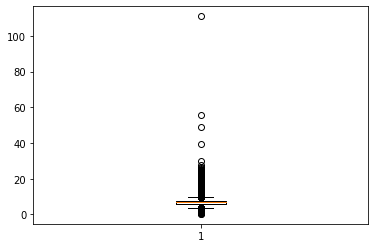

In [76]:
plt.boxplot(tuned_retards_df['VelocMitjanaVol'])
plt.show()

In [77]:
import seaborn as sns

C:\Users\Enric\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


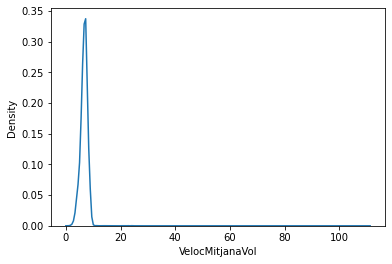

In [78]:
sns.distplot(tuned_retards_df['VelocMitjanaVol'], hist=False);


+ *Comprovo que hi ha outliers amb valors molt extrems, que distorsonen els estadístics bàsics de la variable (mean i std)*

  *Miro de transformar d'alguna manera aquesta nova variable, per tal de
   tenir unes dades més adequades per resumir estadísticament i per fer gràfiques*

+ *Aplicarem un mètode IQR Score per desfer-nos del outliers (que estan per sota de Q1 - 1,5\*IQR i per sobre 
   de Q2  + 1,5\*IQR)*

In [79]:
Q1 = tuned_retards_df['VelocMitjanaVol'].quantile(0.25)
Q3 = tuned_retards_df['VelocMitjanaVol'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.6070175438596497


In [80]:
vel_mit_vol_nooutliers = tuned_retards_df[~((tuned_retards_df['VelocMitjanaVol'] < (Q1 - 1.5 * IQR)) |(tuned_retards_df['VelocMitjanaVol'] > (Q3 + 1.5 * IQR)))]
vel_mit_vol_nooutliers.shape

(196534, 55)

In [81]:
vel_mit_vol_nooutliers['VelocMitjanaVol'].describe()

count    196534.000000
mean          6.666105
std           1.189325
min           3.456140
25%           5.914286
50%           6.752941
75%           7.481250
max           9.881818
Name: VelocMitjanaVol, dtype: float64

+ *Ara que ens hem desfet del valors extrems, fem un boxplot*

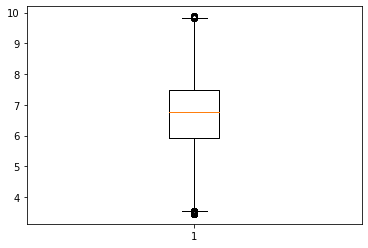

In [82]:
plt.boxplot(vel_mit_vol_nooutliers['VelocMitjanaVol'])
plt.show()

+ *Per exemple, també podem mirar quines destinacions tenen una major velocitat mitjana de vol*

  *Genero un DataFrame amb groupby sobre el Destí dels vols, lligat amb la mitja de la velocitat mitjana de vol que tenen*

In [83]:
mean_vel_mit_vol_df = tuned_retards_df.groupby('Dest')[['VelocMitjanaVol']].mean()
mean_vel_mit_vol_df

,VelocMitjanaVol
Dest,
ABE,7.401408
ABI,4.686186
ABQ,7.059710
ABY,5.240508
ACK,4.867997
...,...
WYS,4.706897
XNA,6.720472
YAK,5.593331


+ *Genero un sub dataset amb els destins que tene les 10 velocitat mitjana de vol més altes*

In [84]:
vmv_top10 = mean_vel_mit_vol_df.sort_values(['VelocMitjanaVol'], ascending=False)[ :11]
vmv_top10

,VelocMitjanaVol
Dest,
ACY,8.532691
RFD,8.488019
STX,8.359056
BQN,8.132874
SJU,8.123123
PSE,8.082285
STT,8.037351
EYW,7.727285
AVP,7.546768


+ *I faig un barplot per visualitzar-ho*

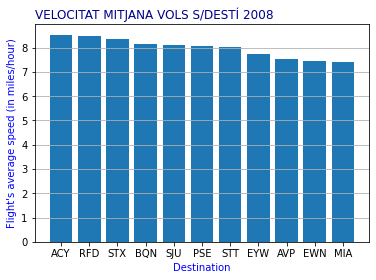

<Figure size 2880x144 with 0 Axes>

In [85]:
x = vmv_top10.index
y = vmv_top10['VelocMitjanaVol']

plt.bar(x, y)
plt.title("VELOCITAT MITJANA VOLS S/DESTÍ 2008", color = 'Darkblue', loc = 'left')
plt.xlabel('Destination', color = 'b')
plt.ylabel('Flight\'s average speed (in miles/hour)', color = 'b')
plt.grid(axis = 'y')
plt.figure(figsize=(40, 2))

plt.show()

+ *__Ara mirem qué podem fer amb "Departurelate?__"

+ *Primer de tot veure com es distribueix la variable entre 'YES' i 'NO?*

In [86]:
tuned_retards_df['DepartureLate?'].value_counts()

YES    111505
NO      88492
Name: DepartureLate?, dtype: int64

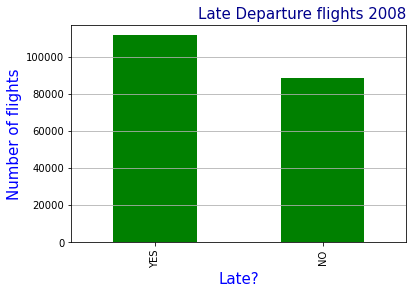

In [87]:
tuned_retards_df['DepartureLate?'].value_counts().plot(kind='bar', color = 'g')
plt.title("Late Departure flights 2008", color = 'Darkblue',size = 15, loc = 'right')
plt.xlabel('Late?', color = 'b', size = 15)
plt.ylabel('Number of flights', color = 'b', size = 15)
plt.grid(axis = 'y')

+ *També podem estudiar quins aeroports d'origen tenen més retards (tal com ho hem definit abans: DepartureLate? = 'YES' 
   si és major de 20 minuts*

+ *Genero el ranking dels 15 aeroports d'origen amb més retards*

In [88]:
is_delayed = tuned_retards_df['DepartureLate?'] == 'YES'
delayed_airport = tuned_retards_df[is_delayed]
delayed_airport[['Origin']].value_counts()[:16]

Origin
ORD       8377
ATL       7383
DFW       5492
DEN       4087
EWR       3429
LAX       3173
LAS       2967
PHX       2854
IAH       2844
SFO       2809
DTW       2443
JFK       2307
MCO       2101
LGA       2051
CLT       1942
PHL       1837
dtype: int64

+ *I també estudiem com es comporta la variable "DepatureLate?" al llarg dels dies de la setmana*

In [93]:
origin_deplate_df = tuned_retards_df[['DayOfWeek','DepartureLate?']]
origin_deplate_df

,DayOfWeek,DepartureLate?
0,1,NO
1,3,NO
2,6,YES
3,4,NO
4,5,NO
...,...,...
199992,5,YES
199993,7,NO
199994,1,NO
199995,7,NO


<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

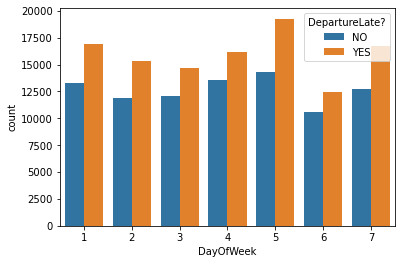

In [94]:
sns.countplot(x = origin_deplate_df['DayOfWeek'], data = origin_deplate_df, hue =origin_deplate_df['DepartureLate?'])